# Homework 1
## Programming assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver

In [2]:
# define ODE
def damped_oscillator(t,y,gamma,omega0):
    yderive = np.array([y[1],-2*gamma*y[1]-omega0**2*y[0]])
    return yderive

# define inputs
gamma_ud = 0.2     #1/s
gamma_cr = 1.0     #1/s
gamma_od = 1.2     #1/s
omega0 = 1         #rad/s
A = 1              #cm
phi = -np.pi/2     #rad

# set up time and initial condition
t_span = (0,20)
t_eval = np.linspace(0,20,2001)
y0 = np.array([0,1])

# use solver
sol_ud = solver.solve_ivp(damped_oscillator,t_span,y0,'RK4',t_eval,args=(gamma_ud,omega0))
sol_cr = solver.solve_ivp(damped_oscillator,t_span,y0,'RK4',t_eval,args=(gamma_cr,omega0))
sol_od = solver.solve_ivp(damped_oscillator,t_span,y0,'RK4',t_eval,args=(gamma_od,omega0))


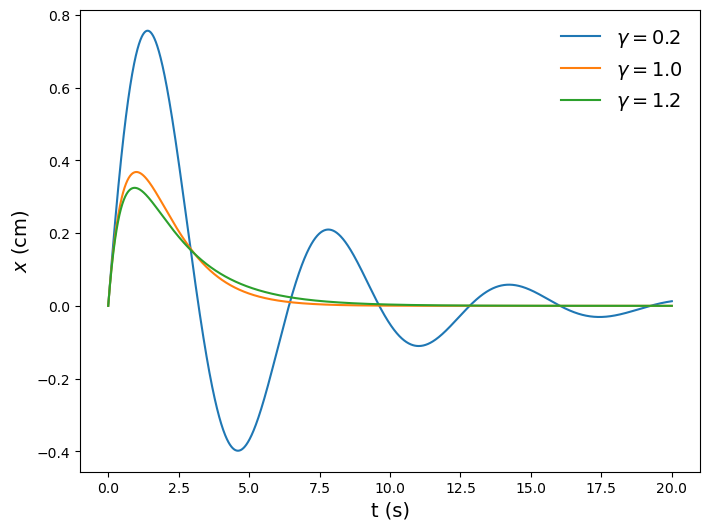

In [3]:
plt.figure(1,figsize=(8,6))
plt.plot(t_eval,sol_ud[0,:],label = r'$\gamma = 0.2$')
plt.plot(t_eval,sol_cr[0,:],label = r'$\gamma = 1.0$')
plt.plot(t_eval,sol_od[0,:],label = r'$\gamma = 1.2$')
#plt.plot(t_eval,sol_ana,ls = ':',label = 'Analytical sol')
plt.legend(frameon = False,fontsize = 14)
plt.xlabel('t (s)',fontsize = 14)
plt.ylabel(r'$x$ (cm)',fontsize = 14)
plt.savefig('hw1_plots/q1_xt.pdf')

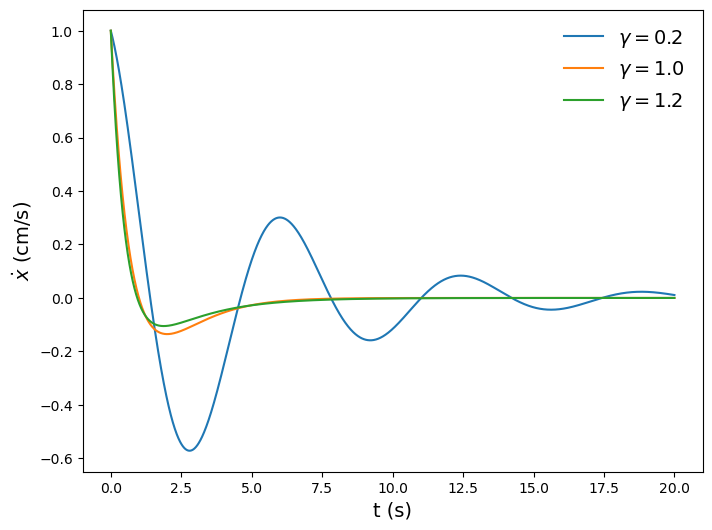

In [4]:
plt.figure(2,figsize=(8,6))
plt.plot(t_eval,sol_ud[1,:],label = r'$\gamma = 0.2$')
plt.plot(t_eval,sol_cr[1,:],label = r'$\gamma = 1.0$')
plt.plot(t_eval,sol_od[1,:],label = r'$\gamma = 1.2$')
#plt.plot(t_eval,sol_ana,ls = ':',label = 'Analytical sol')
plt.legend(frameon = False,fontsize = 14)
plt.xlabel('t (s)',fontsize = 14)
plt.ylabel(r'$\dot{x}$ (cm/s)',fontsize = 14)
plt.savefig('hw1_plots/q1_vt.pdf')

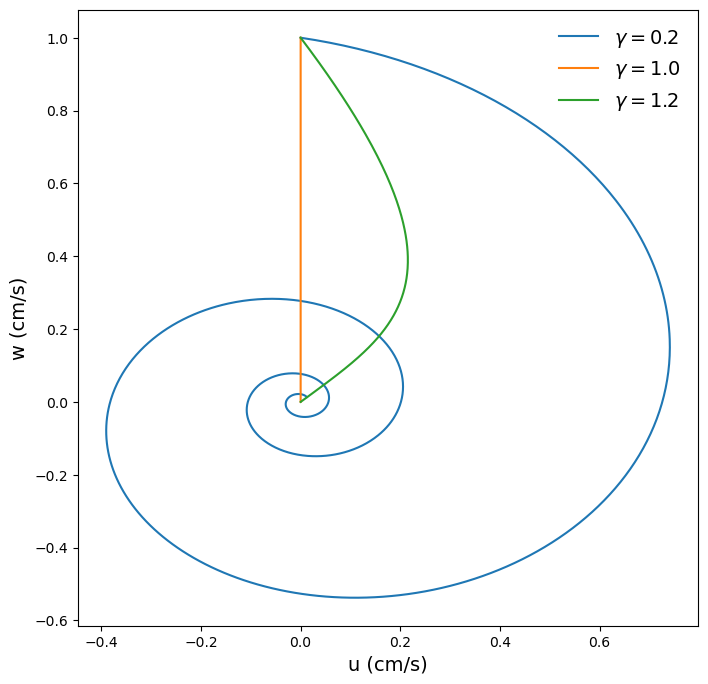

In [5]:
def w(sol,gamma):
    return gamma*sol[0,:]+sol[1,:]

def u(sol,gamma,omega0):
    omega = np.sqrt(abs(omega0**2-gamma**2))
    return omega*sol[0,:]

plt.figure(3,figsize=(8,8))
plt.plot(u(sol_ud,gamma_ud,omega0),w(sol_ud,gamma_ud),
         label = r'$\gamma = 0.2$')
plt.plot(u(sol_cr,gamma_cr,omega0),w(sol_cr,gamma_cr),
         label = r'$\gamma = 1.0$')
plt.plot(u(sol_od,gamma_od,omega0),w(sol_od,gamma_od),
         label = r'$\gamma = 1.2$')
#plt.plot(t_eval,sol_ana,ls = ':',label = 'Analytical sol')
plt.legend(frameon = False,fontsize = 14)
plt.xlabel('u (cm/s)',fontsize = 14)
plt.ylabel('w (cm/s)',fontsize = 14)
plt.savefig('hw1_plots/q1_wu.pdf')

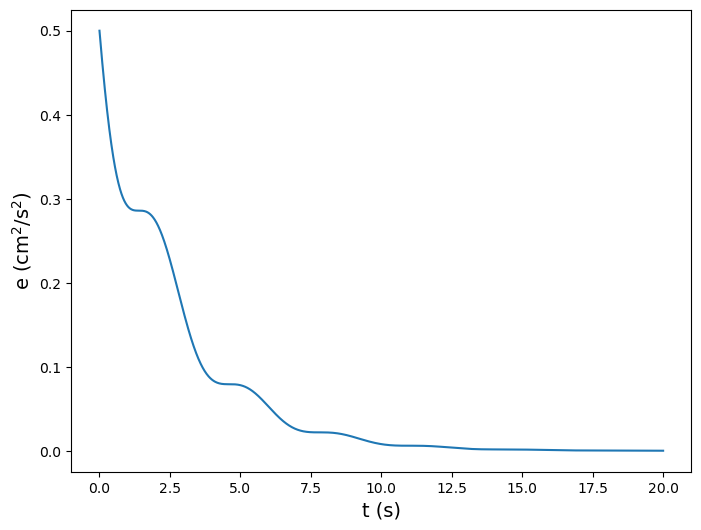

In [6]:
# total energy per unit of mass
def E (sol,omega0):
    return 0.5*sol[1,:]**2+0.5*omega0**2*sol[0,:]**2

E_ud = E(sol_ud,omega0)

plt.figure(4,figsize=(8,6))
plt.plot(t_eval,E_ud)
plt.xlabel('t (s)',fontsize=14)
plt.ylabel(r'e ($\mathrm{cm^2/s^2}$)',fontsize=14)
plt.savefig('hw1_plots/et.pdf')

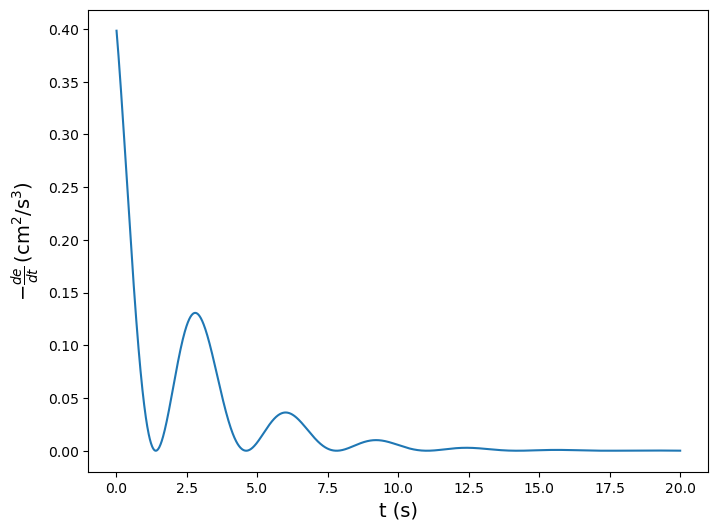

In [7]:
# energy loss
E_loss = -(E_ud[1:]-E_ud[:-1])/(t_eval[1:]-t_eval[:-1])
midt = (t_eval[:-1]+t_eval[1:])/2

plt.figure(5,figsize=(8,6))
plt.plot(midt,E_loss)
plt.xlabel('t (s)', fontsize = 14)
plt.ylabel(r'$-\frac{de}{dt}\,(\mathrm{cm^2/s^3})$',fontsize = 14)
plt.savefig('hw1_plots/loss_rate.pdf')

In [8]:
# resonance
def forced_oscillator(t,y,gamma,omega0,F0,omegaf):
    yderive = np.array([y[1],F0*np.cos(omegaf*t)-2*gamma*y[1]-omega0**2*y[0]])
    return yderive

def D (n,func, tmin, tmax, t_span, y0, method, t_eval, args):
    sol = solver.solve_ivp(func, t_span, y0, method, t_eval, args)
    c = (t_eval > tmin) & (t_eval < tmax)
    D = np.max(abs(sol[n,np.where(c)]))
    return D


# define inputs
F0 = 0.5
omegaf = np.linspace(0.5,1.5,21)
omega0 = 1         #rad/s
gamma_a = 0.01/2
gamma_b = 0.1/2
gamma_c = 0.3/2
A = 1              #cm
phi = -np.pi/2     #rad

# set up time and initial condition
t_span = (0,50)
t_eval = np.linspace(0,50,5001)
y0 = np.array([0,1])

# solve
D_alist = list()
D_blist = list()
D_clist = list()
for ff in omegaf:
    D_alist.append(D(0,forced_oscillator,40,50,t_span,y0,'RK4',t_eval,args=(gamma_a,omega0,F0,ff)))
    D_blist.append(D(0,forced_oscillator,40,50,t_span,y0,'RK4',t_eval,args=(gamma_b,omega0,F0,ff)))
    D_clist.append(D(0,forced_oscillator,40,50,t_span,y0,'RK4',t_eval,args=(gamma_c,omega0,F0,ff)))

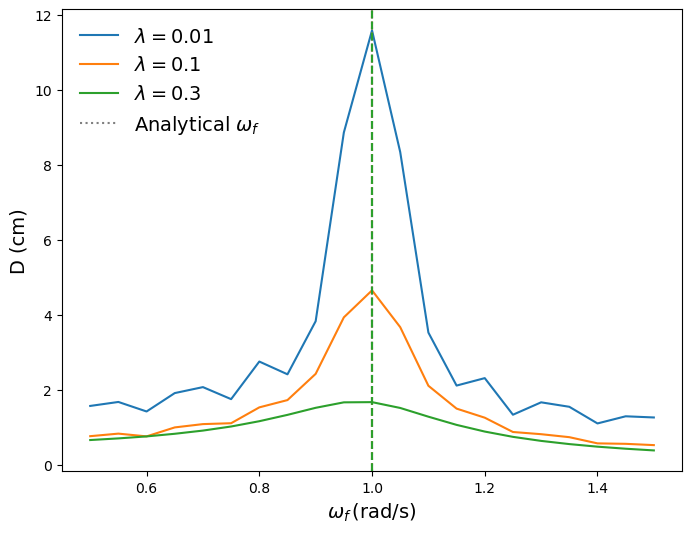

In [9]:
plt.figure(6,figsize=(8,6))
plt.plot(omegaf,D_alist,label = r'$\lambda = 0.01$' )
plt.plot(omegaf,D_blist,label = r'$\lambda = 0.1$')
plt.plot(omegaf,D_clist,label=r'$\lambda = 0.3$')
plt.xlabel(r'$\omega_f\,\mathrm{(rad/s)}$',fontsize = 14)
plt.ylabel('D (cm)',fontsize = 14)
plt.axvline(1,ls = ':',c = 'grey',label = r'Analytical $\omega_f$')
plt.axvline(omegaf[np.where(D_alist == max(np.array(D_alist)))],ls = '--', c= '#1f77b4')
plt.axvline(omegaf[np.where(D_blist == max(np.array(D_blist)))],ls = '--', c= '#ff7f0e',alpha = .8)
plt.axvline(omegaf[np.where(D_clist == max(np.array(D_clist)))],ls = '--',c= '#2ca02c')
plt.legend(frameon=False,fontsize = 14,loc = 'upper left')
#plt.savefig('hw1_plots/resonance.pdf')

### RLC circuit ODE
$$L\ddot{q}+R\dot{q}+\frac{q}{C} = E_0\sin(\omega t)$$

In [10]:
def RLC(t,y,L,R,C,E0,omega):
    yderive = np.array([y[1],(E0*np.sin(omega*t)-R*y[1]-y[0]/C)/L])
    return yderive

E0 = 1
L = 1
C = 1
R = 0.8
omega = 0.7

t_span = (0,50)
t_eval = np.linspace(0,50,501)
y0 = np.array([0,0])

sol_RLC = solver.solve_ivp(RLC,t_span,y0,'RK4',t_eval,args=(L,R,C,E0,omega))

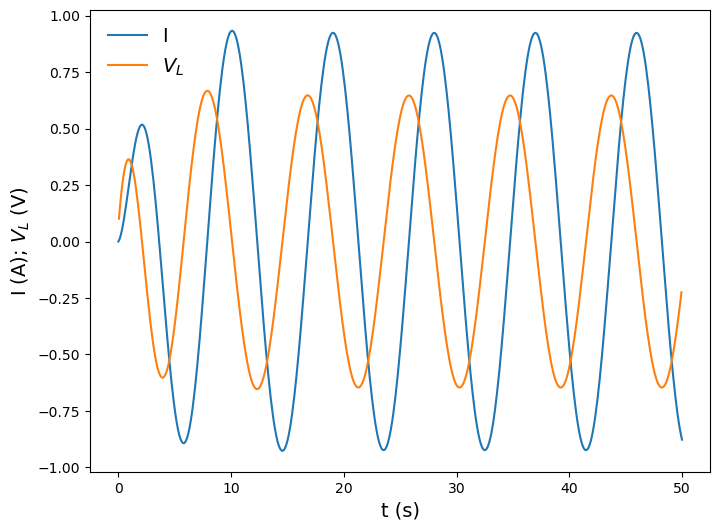

In [11]:
V_L = L*(sol_RLC[1,1:]-sol_RLC[1,:-1])/(t_eval[1:]-t_eval[:-1])
midt = (t_eval[1:]+t_eval[:-1])/2

plt.figure(7,figsize=(8,6))
plt.plot(t_eval,sol_RLC[1,:],label = 'I')
plt.plot(midt,V_L,label = r'$V_L$')
plt.xlabel('t (s)',fontsize =14)
plt.ylabel(r'I (A); $V_L$ (V)',fontsize = 14)
plt.legend(frameon = False,fontsize = 14)
plt.savefig('hw1_plots/4b.pdf')

In [12]:
def RLC_res_f (n,func, tmin, tmax, t_span, y0, method, t_eval, args):
    sol = solver.solve_ivp(func, t_span, y0, method, t_eval, args)
    c = (t_eval > tmin) & (t_eval < tmax)
    V_L = L*np.gradient(sol[n,:],t_eval)
    D = np.average(abs(sol[n,np.where(c)]))
    V = np.average(abs(V_L[np.where(c)]))
    return D,V

omegat = np.linspace(0.3,1.5,13)

I_list = list()
V_list = list()
for tt in omegat:
    I,V = RLC_res_f(1,RLC,40,50,t_span,y0,'RK4',t_eval,args=(L,R,C,E0,tt))
    I_list.append(I)
    V_list.append(V)

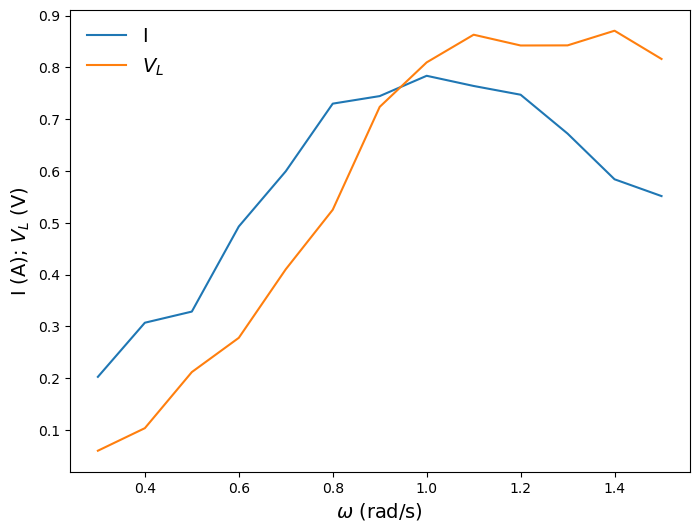

In [13]:
plt.figure(8,figsize=(8,6))
plt.plot(omegat,I_list,label = 'I')
plt.plot(omegat,V_list,label = r'$V_L$')
plt.xlabel(r'$\omega$ (rad/s)',fontsize = 14)
plt.ylabel(r'I (A); $V_L$ (V)',fontsize = 14)
plt.legend(frameon=False, fontsize = 14)
plt.savefig('hw1_plots/4c_lres.pdf')